# Data analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

Neighboring files:
Directory: __pycache__


NameError: name 'parameter_values' is not defined

In [4]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data.keys())
print(parameter_values)

LEARNING_RATE_RL
BG_NOISE
N_DISTRACTORS
ANNEALING_SLOPE
TARGET_WIDTH
RA_SIG_SLOPE
JUMP_SLOPE
RA_NOISE
ANNEALING_MID
REWARD_WINDOW
WEIGHT_JUMP
N_BG_CLUSTERS
LEARNING_RATE_HL
ANNEALING_MID_DECAY
ANNEALING
JUMP_MID
BG_SIG_SLOPE
dict_keys(['LEARNING_RATE_RL', 'BG_NOISE', 'N_DISTRACTORS', 'ANNEALING_SLOPE', 'TARGET_WIDTH', 'RA_SIG_SLOPE', 'JUMP_SLOPE', 'RA_NOISE', 'ANNEALING_MID', 'REWARD_WINDOW', 'WEIGHT_JUMP', 'N_BG_CLUSTERS', 'LEARNING_RATE_HL', 'ANNEALING_MID_DECAY', 'ANNEALING', 'JUMP_MID', 'BG_SIG_SLOPE'])
{'LEARNING_RATE_RL': array([0.01, 0.05, 0.1 , 0.2 , 0.4 ]), 'BG_NOISE': array([0.05, 0.2 , 0.75, 0.1 ]), 'N_DISTRACTORS': array([10., 20.,  5., 50.]), 'ANNEALING_SLOPE': array([1., 2., 3., 4., 5., 6.]), 'TARGET_WIDTH': array([0.1, 0.2, 0.3, 0.5, 0.7]), 'JUMP_SLOPE': array([5., 3., 2., 4., 1.]), 'RA_NOISE': array([0.01, 0.02, 0.05, 0.1 , 0.  ]), 'ANNEALING_MID': array([3., 2., 4., 1.]), 'REWARD_WINDOW': array([5.]), 'WEIGHT_JUMP': array([0., 1.]), 'N_BG_CLUSTERS': array([10.,  2.]), 

In [5]:
parameter_values['ANNEALING'] 
data['ANNEALING']

array([[0.99938094, 0.97245175],
       [0.98319985, 0.90689929],
       [0.64550445, 0.88615846],
       [0.45199695, 0.41943012],
       [0.60888866, 0.62081369],
       [0.99946876, 0.96606876],
       [0.98969741, 0.99871485],
       [0.43796566, 0.22268473],
       [0.99607259, 0.95718485],
       [0.67596581, 0.63026722]])

In [10]:
wanted_directories = ["BG_NOISE"]

4


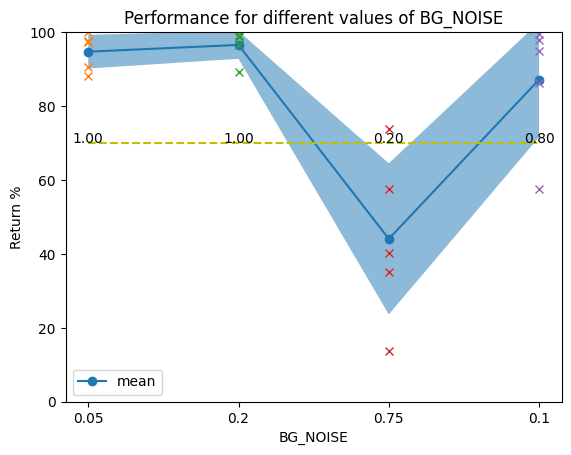

In [11]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in data.keys():
        if directory in wanted_directories:
            param = directory
            returns = 100*data[directory]
            n_values = len(parameter_values[directory])
            print(n_values)
            above_threshold = np.zeros(n_values)
            for i in range(n_values):
                above_threshold[i] = np.sum(returns[:,i] > 70)
            above_threshold /= returns.shape[0]
            plt.figure()
            means = np.mean(returns, axis=0)
            std = np.std(returns, axis=0)
            plt.plot(means, label='mean', marker='o')
            plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
            for i in range(n_values):
                plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
            plt.ylim(0, 100)
            for i in range(n_values):
                plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
            plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
            plt.xticks(np.arange(n_values, step=1), labels = parameter_values[directory])
            plt.title(f'Performance for different values of {param}')
            plt.xlabel(param)
            plt.ylabel('Return %')
            plt.legend()
            plt.show()


Need to rearrange the parameter values properly. 

NameError: name 'parameter_names' is not defined

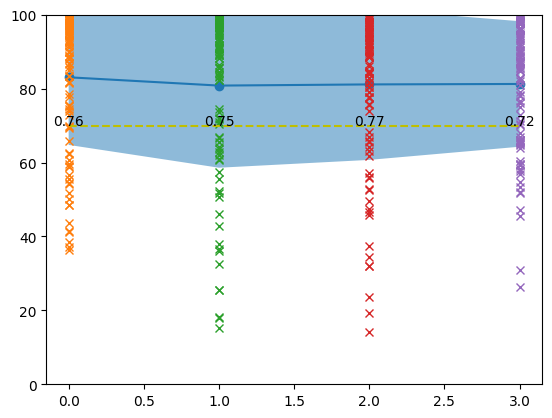

In [13]:
directory = 'RA_SIG_SLOPE'
param = directory
returns = 100*data[directory]
n_values = min(returns.shape)
above_threshold = np.zeros(n_values)
for i in range(n_values):
    above_threshold[i] = np.sum(returns[:,i] > 70)
above_threshold /= returns.shape[0]
plt.figure()
means = np.mean(returns, axis=0)
std = np.std(returns, axis=0)
plt.plot(means, label='mean', marker='o')
plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
for i in range(n_values):
    plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
plt.ylim(0, 100)
for i in range(n_values):
    plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
plt.xticks(np.arange(n_values, step=1), labels = parameter_names[param])
plt.title(f'Performance for different values of {param}')
plt.xlabel(param)
plt.ylabel('Return %')
plt.legend()
plt.show()